In [1]:
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

In [2]:
rng = np.random.default_rng()
rng

Generator(PCG64) at 0x122FB0D3580

# T-test

Null hypothesis that 2 independent samples have identical average (expected) values. 

This test assumes that the populations have identical variances by default.

In [4]:
p_vals = []
for _ in range(1000):
    rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
    rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
    p_vals.append(stats.ttest_ind(rvs1, rvs2)[1])

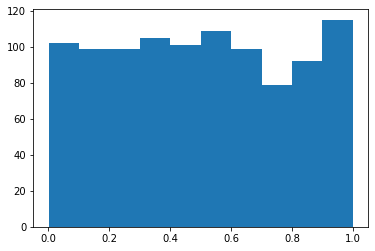

In [5]:
plt.hist(p_vals)
plt.show()

for identically samples p-vals distributed uniformally

In [8]:
# T-test with different variance:
rvs3 = stats.norm.rvs(loc=5, scale=200, size=500, random_state=rng)
stats.ttest_ind(rvs1, rvs3)

Ttest_indResult(statistic=-0.07854149750991322, pvalue=0.9374130662861829)

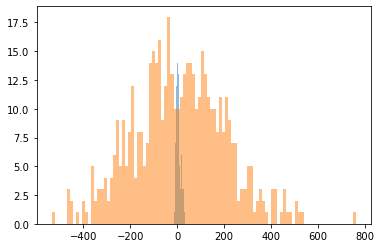

In [7]:
plt.hist(rvs1, bins=100, alpha=0.5, label='x')
plt.hist(rvs3, bins=100, alpha=0.5, label='y')
plt.show()

t-test cant catch difference btw samples w different variance

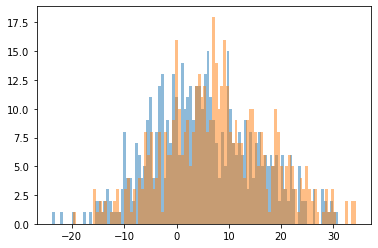

Ttest_indResult(statistic=-4.1251199636876015, pvalue=4.014056940660199e-05)

In [9]:
# T-test with different means:
rvs5 = stats.norm.rvs(loc=8, scale=10, size=500, random_state=rng)
plt.hist(rvs1, bins=100, alpha=0.5, label='x')
plt.hist(rvs5, bins=100, alpha=0.5, label='y')
plt.show()
stats.ttest_ind(rvs1, rvs5)

Refer to test two samples have different average (expected) values

**Take two samples, one of which has an extreme tail**

In [10]:
a = (56, 128.6, 12, 123.8, 64.34, 78, 763.3)
b = (1.1, 2.9, 4.2)

In [11]:
stats.ttest_ind(a, b)

Ttest_indResult(statistic=1.099305186099593, pvalue=0.30361296704535845)

In [12]:
trim=.2

In [13]:
trim*len(a)

1.4000000000000001

In [14]:
np.floor(trim*len(a))

1.0

In [15]:
np.floor(trim*len(b))

0.0

In [16]:
stats.ttest_ind(a, b, trim=.2)

Ttest_indResult(statistic=3.4463884028073513, pvalue=0.01369338726499547)

# Two-samples KS-test

In [181]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import lognormal

#set seed (e.g. make this example reproducible)
seed(0)

#generate two datasets
K = [1, 1, 2]
mu_0 = [0, 1, 0]

data = []

for mu_0, K in zip(mu_0, K):
    data.append(mu_0 + K * randn(1000)) # N(mu_0, K^2)

In [182]:
# data[0]

In [189]:
from scipy.stats import ks_2samp

#perform Kolmogorov-Smirnov test
# This test compares the underlying continuous distributions F(x) and G(x)
# of two independent samples.

In [190]:
ks_2samp(data[0], data[0])

KstestResult(statistic=0.0, pvalue=1.0)

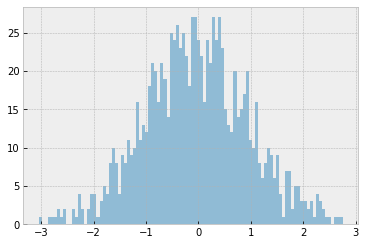

In [202]:
plt.hist(data[0], bins=100, alpha=0.5, label='x')
plt.show()

In [192]:
ks_2samp(data[0], data[1])

KstestResult(statistic=0.431, pvalue=9.256398497811612e-84)

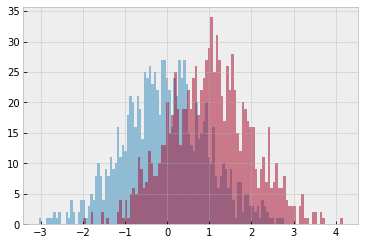

In [194]:
plt.hist(data[0], bins=100, alpha=0.5, label='x')
plt.hist(data[1], bins=100, alpha=0.5, label='y')
plt.show()

In [196]:
ks_2samp(data[0], data[2])

KstestResult(statistic=0.18, pvalue=1.445613070447519e-14)

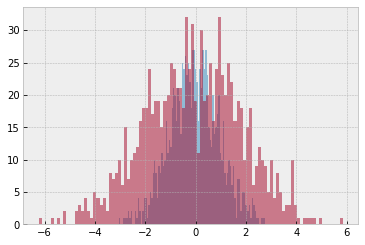

In [195]:
plt.hist(data[0], bins=100, alpha=0.5, label='x')
plt.hist(data[2], bins=100, alpha=0.5, label='y')
plt.show()

In [197]:
# pip install bootstrapped

In [17]:
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

mean = 100
stdev = 10

population = np.random.normal(loc=mean, scale=stdev, size=50000)

# take 1k 'samples' from the larger population
samples = population[:1000]

print(bs.bootstrap(samples, stat_func=bs_stats.mean))

99.87854898722327    (99.22856273724493, 100.51435084853429)


In [18]:
samples.mean()

99.87854898722327

In [19]:
print(bs.bootstrap(samples, stat_func=bs_stats.std))

10.191589506919637    (9.73290178341507, 10.647666801890303)


In [20]:
samples.std()

10.191589506919637